In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/asad/Desktop/Customer Churn .csv')

In [3]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## replacing blank with 0 as tenure is 0 and no total charges and recordes

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# isnull() is check the null values in our dataset if any null then it returns true.
# isnull().sum is taling the sum of all null values which is return values 

# df.isnull().sum().sum() 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['customerID'].duplicated().sum()

np.int64(0)

In [14]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

# converted 0 and 1 values of senior Citizen to yes/no to make it easier to understand

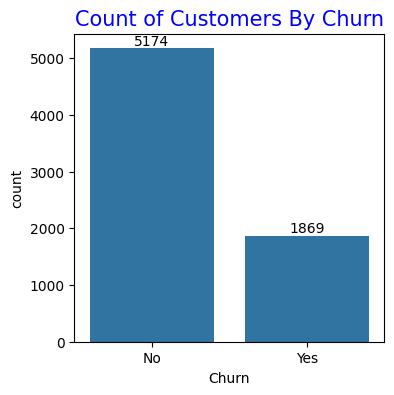

In [15]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers By Churn',fontsize = 15, color='blue')
plt.show()

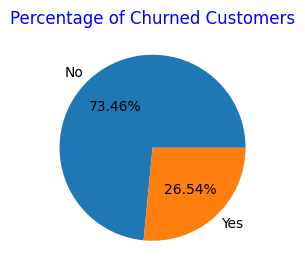

In [16]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title('Percentage of Churned Customers', fontsize = 12, color='blue')
plt.show()

### from the given pie chart we can conclude that 26.54% of our customers have churned out.
### know explore the reason behind it

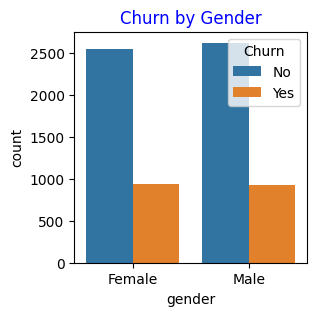

In [17]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title('Churn by Gender', fontsize = 12, color='blue')
plt.show()

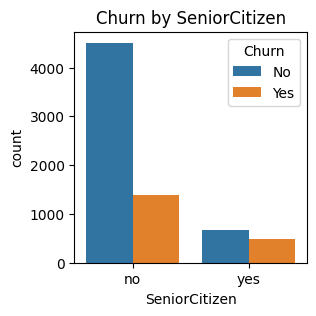

In [18]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'SeniorCitizen', data = df, hue = 'Churn')
plt.title('Churn by SeniorCitizen')
plt.show()

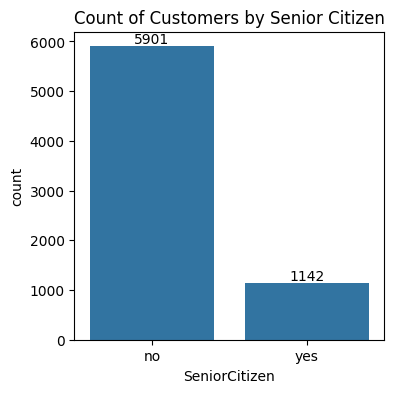

In [19]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Senior Citizen')
plt.show()

/var/folders/5z/5szpbpjj0j34fmhkzqf9mkwc0000gn/T/ipykernel_10569/2666331902.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom[i] + value / 2,


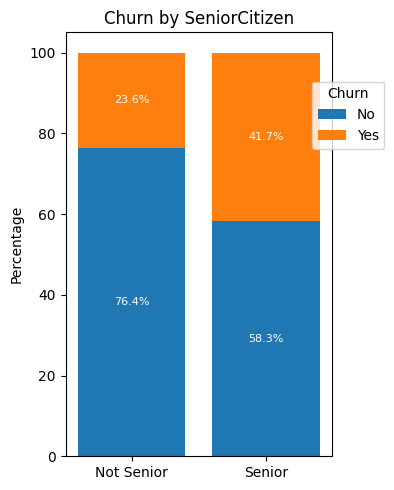

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Create percentage table
percent_df = (
    pd.crosstab(df['SeniorCitizen'], df['Churn'])
      .apply(lambda x: x / x.sum() * 100, axis=1)
)

# Plot stacked bar chart
plt.figure(figsize=(4,5))
bottom = [0] * len(percent_df)

for churn in percent_df.columns:
    plt.bar(
        percent_df.index,
        percent_df[churn],
        bottom=bottom,
        label=churn
    )
    
    for i, value in enumerate(percent_df[churn]):
        plt.text(
            i,
            bottom[i] + value / 2,
            f'{value:.1f}%',
            ha='center',
            va='center',
            fontsize=8,
            color='white'
        )
    bottom = bottom + percent_df[churn]

# Formatting (similar to your countplot)
plt.xticks([0,1], ['Not Senior', 'Senior'])
plt.ylabel('Percentage')
plt.title('Churn by SeniorCitizen')
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9)) # Customer legend location
plt.tight_layout()
plt.show()


### comparative a greater percentage of people in senior citizen category have churned

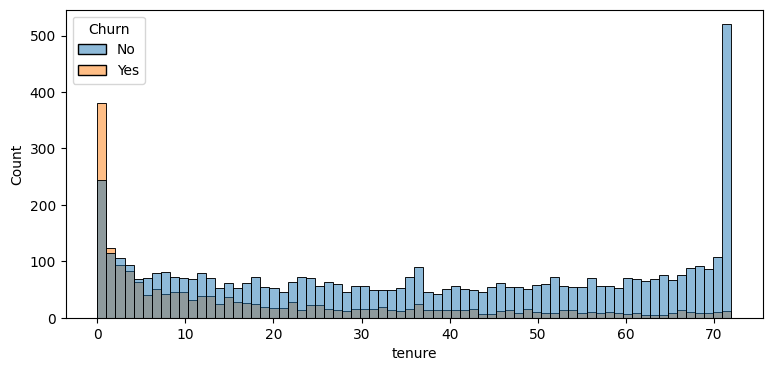

In [23]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 70, hue = 'Churn')
plt.show()

## people who have used our services for a long time have stayed and people who have used our services # 1 or 2 months have churned

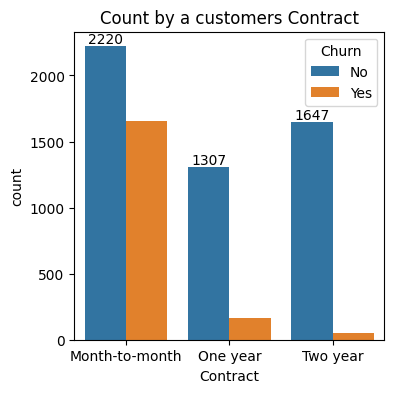

In [24]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count by a customers Contract')
plt.show()

## people who have month to month contract likely to churn then from those who have 1 or 2 years contract.

In [29]:
# df.columns.values
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

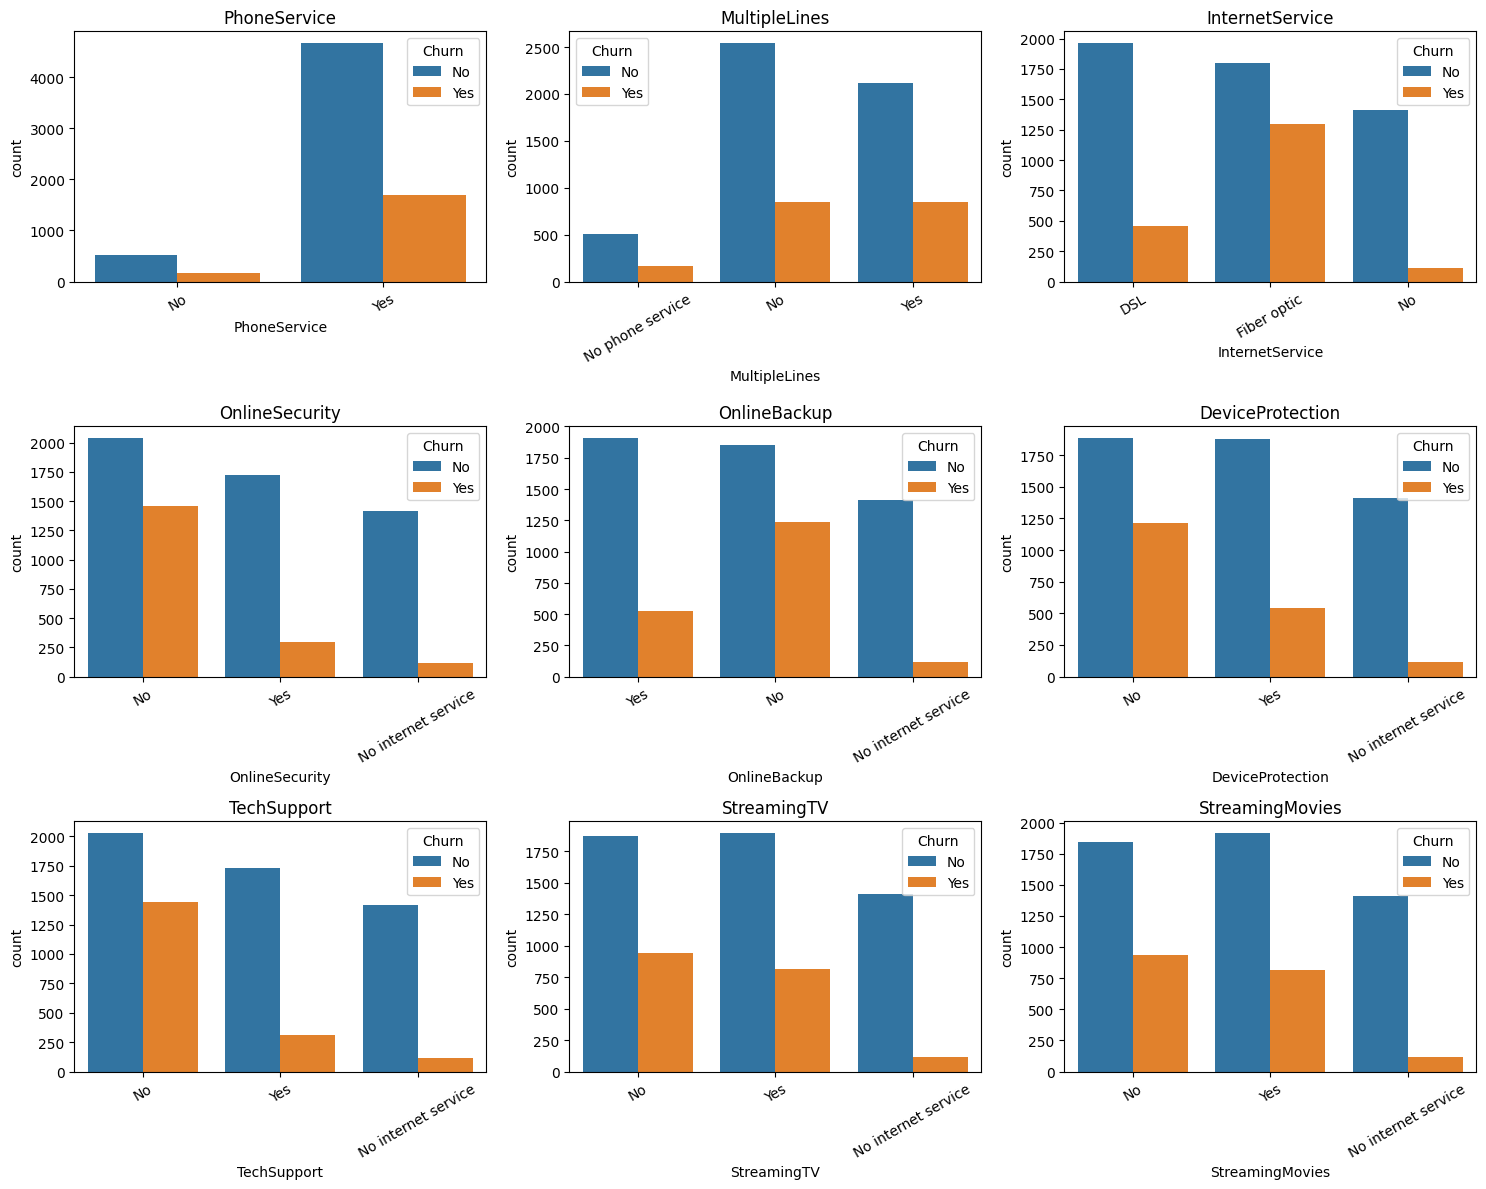

In [156]:

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(15,12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, hue = df['Churn'])
    plt.title(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


## Majority of customers who stayed (No Churn) are those having services like OnlineSecurity, TechSupport, OnlineBackup, and DeviceProtection, showing these features strongly reduce churn. Customers without these services contribute the largest share of churn (Yes) across almost all categories. Fiber optic users form a major portion of churned customers compared to DSL users. Overall, customers with more active services and support features dominate the non-churn group,

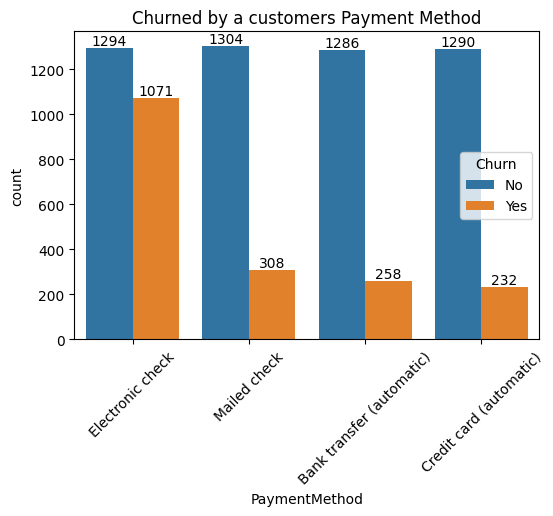

In [163]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title('Churned by a customers Payment Method')
plt.show()

# customers is likely to churn when he is using electronic check as a payment method.